<a href="https://colab.research.google.com/github/RandBerth/Matedis/blob/main/SEMANA_03/Miniproyecto_Rifa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SEMANA 03: COMBINACIONES Y PERMUTACIONES**

## **Proyecto:** Rifa interactiva 🎫

### Intrucciones 📌

1. Genera tu boleto
2. Incia el sorteo
3. Segun aciertos, ¡gana un premio!

### **Estudiantes:**
- Ronnie Herrera
- Esther Ticlla

In [ ]:
!pip install ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.4 MB/s eta 0:00:00


Intento #7
Esther, tu ticket es: [42, 86, 65]
El ticker ganador es: [59, 10, 28]
Lo siento, has acertado menos de 2 números. ¡Sigue intentándolo!
Resultados totales del sorteo: 
Has acertado 0 número(s)


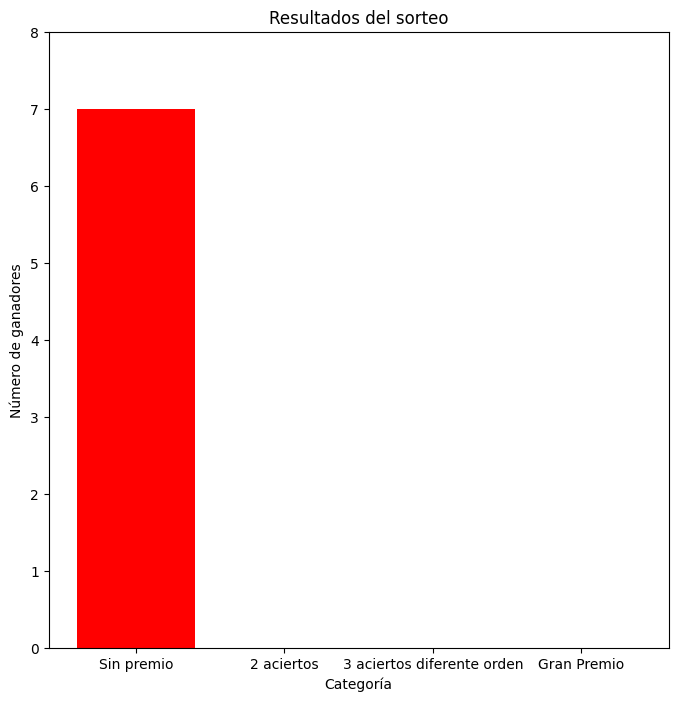

Button(button_style='success', description='Reintentar', layout=Layout(width='200px'), style=ButtonStyle())

In [ ]:
# Bloque: Jugar a la Rifa

import ipywidgets as widgets
from random import randint, seed
from IPython.display import display, clear_output
from ipywidgets import BoundedIntText
import random
import matplotlib.pyplot as plt
import itertools


ticket_usuario = []  # El ticket que el usuario crea o genera
aciertos_usuario = 0  # Contador de aciertos del usuario

# Definir los widgets
name_input = widgets.Text(
    value='',
    placeholder='Escribe tu nombre',
    description='Nombre:',
    disabled=False
)

play_button = widgets.Button(
    description='Comenzar',
    disabled=False,
    button_style='success',
)

# Botones: generar ticket aleatoriamente o crear uno propio
boton_aleatorio = widgets.Button(
    description="Generar Ticket Aleatorio",
    layout=widgets.Layout(width='250px')
)

boton_personalizado = widgets.Button(
    description="Generar mi propio Ticket",
    layout=widgets.Layout(width='250px')
)

num1 = BoundedIntText(min=10, max=99, description="Número 1")
num2 = BoundedIntText(min=10, max=99, description="Número 2")
num3 = BoundedIntText(min=10, max=99, description="Número 3")

boton_generar_manual = widgets.Button(
    description="Confirmar mi Ticket",
    layout=widgets.Layout(width='250px')
)

boton_verificar = widgets.Button(description="🎯 Verificar Ticket", button_style='info')

boton_reintentar = widgets.Button(
    description="Reintentar",
    layout=widgets.Layout(width='200px'),
    button_style='success',
)

# Funciones principales
def mostrar_menu(nombre):
    clear_output()
    print(f"¡Hola, {nombre}! Elige como deseas obtener tu ticket")
    display(boton_aleatorio, boton_personalizado)

def generar_ticket_aleatorio(b):
    global ticket_usuario
    global aciertos_usuario
    clear_output()
    ticket_usuario = random.sample(range(10, 100), 3)
    print(f"{name_input.value}, tu ticket aleatorio es: {ticket_usuario}")
    display(boton_verificar)

def mostrar_formulario_personalizado(b):
    clear_output()
    print(f"{name_input.value}, crea tu ticket ingresando 3 números únicos (rango 10-99):")
    display(num1, num2, num3, boton_generar_manual)

def generar_ticket_manual(b):
    global ticket_usuario
    ticket = [num1.value, num2.value, num3.value]
    if len(set(ticket)) < 3:
        print("Los números deben ser únicos")
    else:
        ticket_usuario = ticket
        print(f"{name_input.value}, tu ticket personalizado es: {ticket}")
        display(boton_verificar)

# Función para manejar el inicio del juego
def on_button_clicked(b):
    if name_input.value.strip() == "":
        print("Por favor, ingresa tu nombre")
    else:
        mostrar_menu(name_input.value)

def volver_a_intentar(b):
    mostrar_menu(name_input.value)

# Vinculamos los botones con sus funciones
play_button.on_click(on_button_clicked)
boton_aleatorio.on_click(generar_ticket_aleatorio)
boton_personalizado.on_click(mostrar_formulario_personalizado)
boton_generar_manual.on_click(generar_ticket_manual)
boton_reintentar.on_click(volver_a_intentar)

# Muestra los widgets iniciales
display(name_input, play_button)

# Aquí estamos usando las categorías de premios definidas en valores.
categorias = ['Sin premio', '2 aciertos', '3 aciertos diferente orden', 'Gran Premio']
valores = [0, 0, 0, 0]

intentos_usuario = 0

# Función para verificar el ticket del usuario
def verificar_ticket(b):
    global aciertos_usuario, valores, intentos_usuario

    clear_output()

    intentos_usuario += 1

    # Mostramos cuántos aciertos tiene el usuario
    print(f"Intento #{intentos_usuario}")

    # GENERAR TICKET GANADOR
    ticket_ganador = random.sample(range(10,100),3)

    print(f"{name_input.value}, tu ticket es: {ticket_usuario}")
    print(f"El ticker ganador es: {ticket_ganador}")

    # Comprobamos en qué categoría se encuentra el usuario
    if ticket_usuario == ticket_ganador:
        aciertos_usuario = 3
        valores[3] += 1
        print("¡Gran premio! Has obtenido el ticket identico.")
    else:
      aciertos_usuario = len(set(ticket_usuario) & set(ticket_ganador))
      if aciertos_usuario == 3:
          valores[2] += 1
          print("¡Felicidades! Has acertado 3 números aunque no en el mismo orden.")
      elif aciertos_usuario == 2:
          valores[1] += 1
          print("¡Buen intento! Has acertado 2 números.")
      else:
          valores[0] += 1
          print("Lo siento, has acertado menos de 2 números. ¡Sigue intentándolo!")

    print("Resultados totales del sorteo: ")
    print(f"Has acertado {aciertos_usuario} número(s)")

    # Visualización de los resultados
    plt.figure(figsize=(8,8))
    plt.bar(categorias, valores, color='red')
    plt.xlabel('Categoría')
    plt.ylabel('Número de ganadores')
    plt.title('Resultados del sorteo')

    plt.yticks(range(0, max(valores) + 2))

    plt.show()

    display(boton_reintentar)

boton_verificar.on_click(verificar_ticket)